In [100]:
import numpy as np
import matplotlib.pyplot as plt

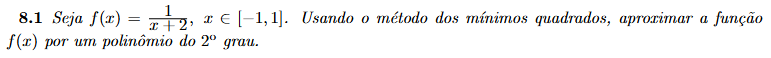

Nesse caso, para realizar a aplicação de uma aproximação de segundo grau usando o MMQ, tomamos

$$ e_0 = (1, 1, \dots, 1)^T; $$
$$ e_1 = (x_0, x_1, \dots, x_m)^T; $$
$$ e_2 = (x_0^2, x_1^2, \dots, x_m^2)^T$$

Mais detalhes em comentários no código.

In [101]:
M = 50
fx81 = lambda x: 1 / (x + 2)

x81 = np.linspace(-1, 1, M)
y81 = fx81(x81)
e0_81 = np.power(x81, 0)
e1_81 = np.power(x81, 1)
e2_81 = np.power(x81, 2)
e_81 = [e0_81, e1_81, e2_81]
# Matriz de produtos internos
C_81 = np.zeros((3, 3), dtype=np.float64)
for i in range(3):
    for j in range(2, i - 1, -1):
        val = np.dot(e_81[i], e_81[j])
        C_81[i, j] = val
        if i != j:
            C_81[j, i] = val

# Vetor de produtos internos
b_81 = np.zeros((3,), dtype=np.float64)
for i in range(3):
    b_81[i] = np.dot(y81, e_81[i])

# Resolução do sistema linear
a_81 = np.linalg.solve(C_81, b_81)

Comparação do resultado obtido

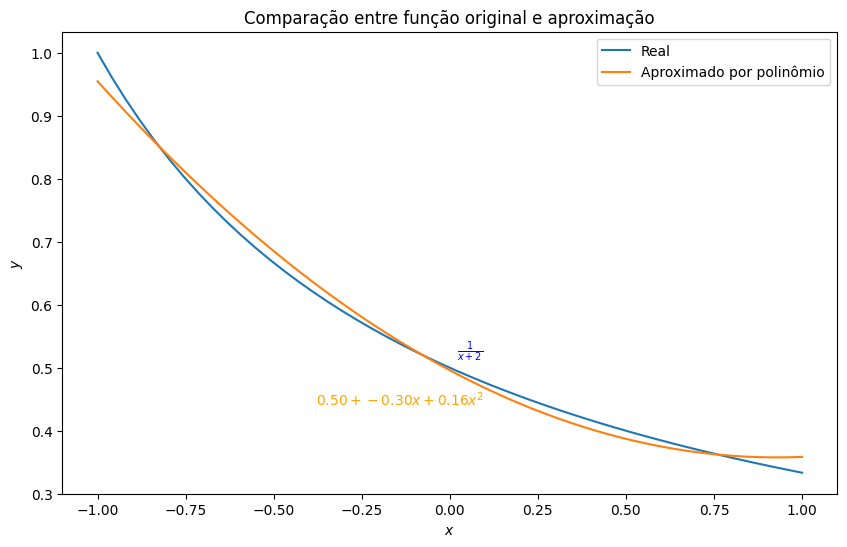

In [102]:
poly81 = lambda x: a_81[0] + a_81[1] * x + a_81[2] * x ** 2
poly81_vals = poly81(x81)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x81, y81, label="Real")
ax.plot(x81, poly81_vals, label="Aproximado por polinômio")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.annotate("$\\frac{1}{x + 2}$", (x81[len(x81) // 2], 1.05 * y81[len(x81) // 2]), color="blue")
ax.annotate(f"${a_81[0]:.2f} + {a_81[1]:.2f} x + {a_81[2]:.2f} x^2$", (x81[len(x81) // 2] - 0.4, 0.9 * poly81_vals[len(x81) // 2]), color="orange")
ax.set_title("Comparação entre função original e aproximação")
plt.show()

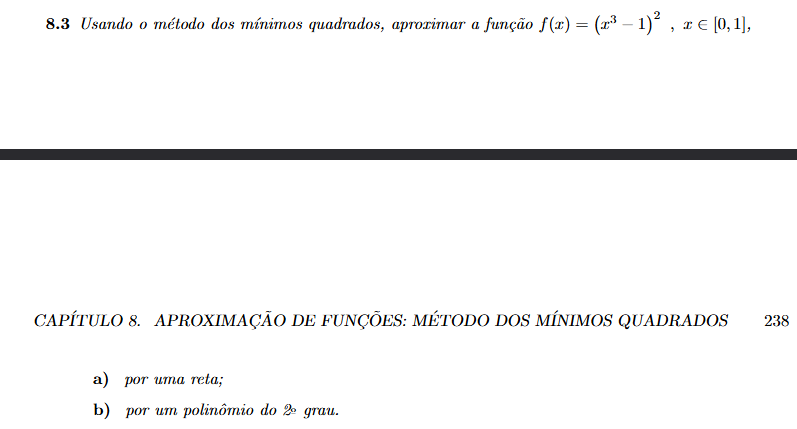

In [103]:
fx83 = lambda x: (x ** 3 - 1) ** 2
x83 = np.linspace(0, 1, M)
y83 = fx83(x83)
e0_83 = np.power(x83, 0)
e1_83 = np.power(x83, 1)
e2_83 = np.power(x83, 2)
e_83 = [e0_83, e1_83, e2_83]
# Matriz de produtos internos
# No caso do item a), vamos limitar a menor principal 2x2
C_83 = np.zeros((3, 3), dtype=np.float64)
for i in range(3):
    for j in range(2, i - 1, -1):
        val = np.dot(e_83[i], e_83[j])
        C_83[i, j] = val
        if i != j:
            C_83[j, i] = val

# Vetor de produtos internos
b_83 = np.zeros((3,), dtype=np.float64)
for i in range(3):
    b_83[i] = np.dot(y83, e_83[i])

# Resolução do sistema linear para o caso de reta
a_83_reta = np.linalg.solve(C_83[:2, :2], b_83[:2])
# Resolução para o caso quadrático
a_83_quadratico = np.linalg.solve(C_83, b_83)

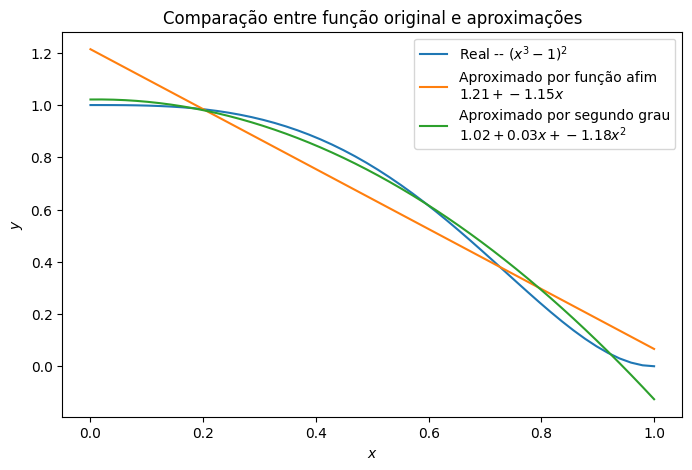

In [104]:
poly83_reta = lambda x: a_83_reta[0] + a_83_reta[1] * x
poly83_reta_vals = poly83_reta(x83)

poly83_quadratico = lambda x: a_83_quadratico[0] + a_83_quadratico[1] * x + a_83_quadratico[2] * x ** 2
poly83_quadratico_vals = poly83_quadratico(x83)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x83, y83, label="Real -- $(x^3 - 1)^2$")
ax.plot(x83, poly83_reta_vals, label=f"Aproximado por função afim\n${a_83_reta[0]:.2f} + {a_83_reta[1]:.2f} x$")
ax.plot(x83, poly83_quadratico_vals, label=f"Aproximado por segundo grau\n${a_83_quadratico[0]:.2f} + {a_83_quadratico[1]:.2f} x + {a_83_quadratico[2]:.2f} x^2$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximações")
plt.show()

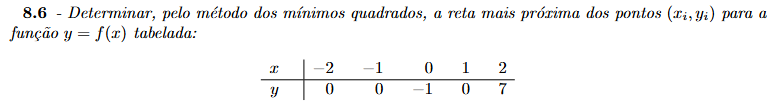

In [105]:
x86 = np.array([-2, -1, 0, 1, 2])
y86 = np.array([0, 0, -1, 0, 7])
e0_86 = np.power(x86, 0)
e1_86 = np.power(x86, 1)
e_86 = [e0_86, e1_86]
# Matriz de produtos internos
C_86 = np.zeros((2, 2), dtype=np.float64)
for i in range(2):
    for j in range(1, i - 1, -1):
        val = np.dot(e_86[i], e_86[j])
        C_86[i, j] = val
        if i != j:
            C_86[j, i] = val

# Vetor de produtos internos
b_86 = np.zeros((2,), dtype=np.float64)
for i in range(2):
    b_86[i] = np.dot(y86, e_86[i])

a_86 = np.linalg.solve(C_86, b_86)

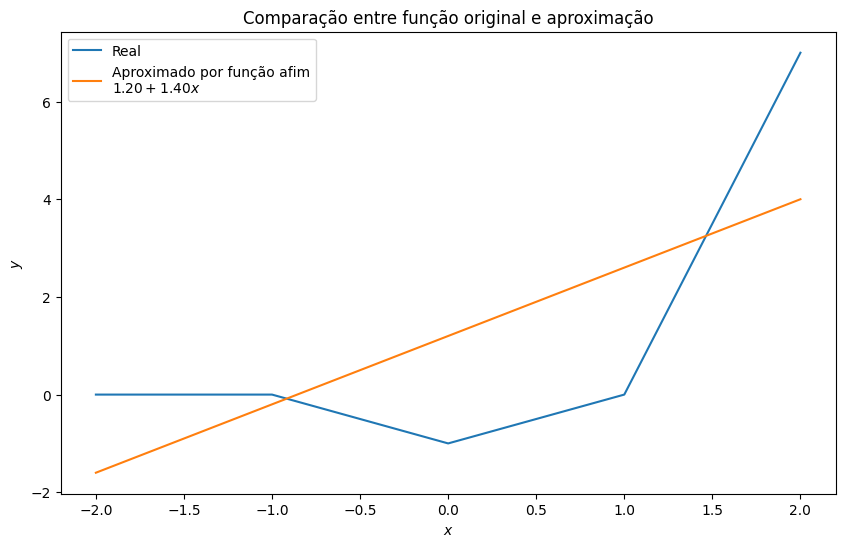

In [106]:
poly86 = lambda x: a_86[0] + a_86[1] * x
poly86_vals = poly86(x86)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x86, y86, label="Real")
ax.plot(x86, poly86_vals, label=f"Aproximado por função afim\n${a_86[0]:.2f} + {a_86[1]:.2f} x$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

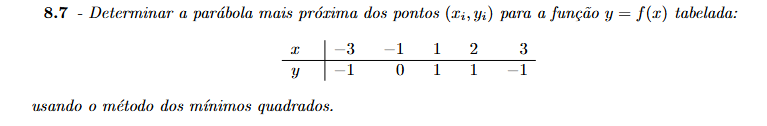

In [107]:
x87 = np.array([-3, -1, 1, 2, 3])
y87 = np.array([-1, 0, 1, 1, -1])
e0_87 = np.power(x87, 0)
e1_87 = np.power(x87, 1)
e2_87 = np.power(x87, 2)
e_87 = [e0_87, e1_87, e2_87]
n = len(e_87)
# Matriz de produtos internos
C_87 = np.zeros((n, n), dtype=np.float64)
for i in range(n):
    for j in range(n - 1, i - 1, -1):
        val = np.dot(e_87[i], e_87[j])
        C_87[i, j] = val
        if i != j:
            C_87[j, i] = val

# Vetor de produtos internos
b_87 = np.zeros((n,), dtype=np.float64)
for i in range(n):
    b_87[i] = np.dot(y87, e_87[i])

a_87 = np.linalg.solve(C_87, b_87)

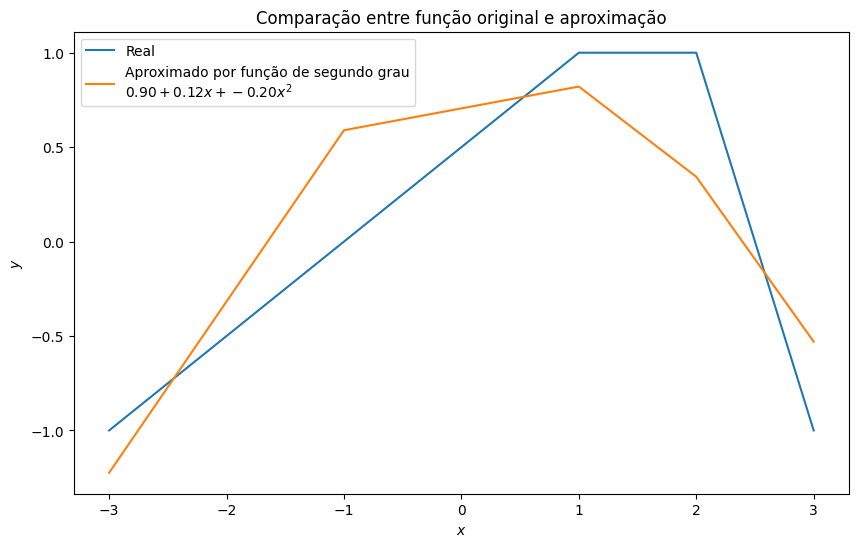

In [108]:
poly87 = lambda x: a_87[0] + a_87[1] * x + a_87[2] * x ** 2
poly87_vals = poly87(x87)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x87, y87, label="Real")
ax.plot(x87, poly87_vals, label=f"Aproximado por função de segundo grau\n${a_87[0]:.2f} + {a_87[1]:.2f} x + {a_87[2]:.2f} x^2$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

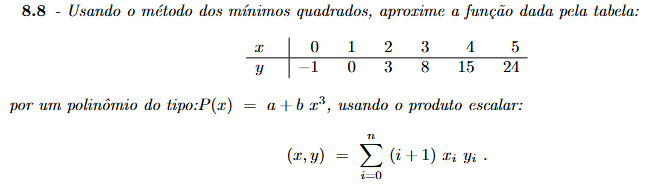

In [109]:
x88 = np.array([0, 1, 2, 3, 4, 5])
y88 = np.array([-1, 0, 3, 8, 15, 24])
e0_88 = np.power(x88, 0)
e2_88 = np.power(x88, 3)
e_88 = [e0_88, e2_88]
n = len(e_88)
# Definição do produto escalar apresentado
def new_dot(x: np.ndarray, y: np.ndarray):
    # Assume-se que x.ndim = y.ndim = 1 e que os tamanhos são iguais.
    sum_value = 0.0
    for i in range(len(x)):
        sum_value += (i + 1) * x[i] * y[i]
    return sum_value

# Matriz de produtos internos
C_88 = np.zeros((n, n), dtype=np.float64)
for i in range(n):
    for j in range(n - 1, i - 1, -1):
        val = new_dot(e_88[i], e_88[j])
        C_88[i, j] = val
        if i != j:
            C_88[j, i] = val

# Vetor de produtos internos
b_88 = np.zeros((n,), dtype=np.float64)
for i in range(n):
    b_88[i] = new_dot(y88, e_88[i])

a_88 = np.linalg.solve(C_88, b_88)

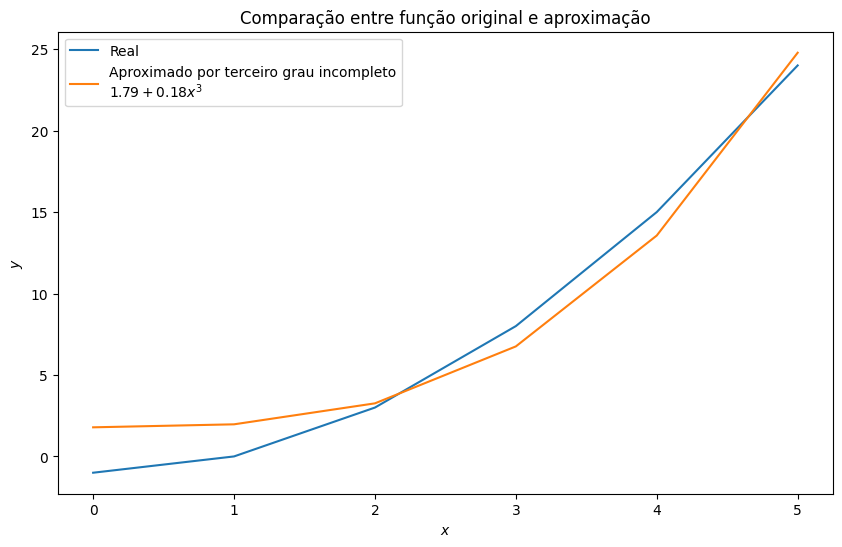

In [110]:
poly88 = lambda x: a_88[0] + a_88[1] * x ** 3
poly88_vals = poly88(x88)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x88, y88, label="Real")
ax.plot(x88, poly88_vals, label=f"Aproximado por terceiro grau incompleto\n${a_88[0]:.2f} + {a_88[1]:.2f} x^3$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

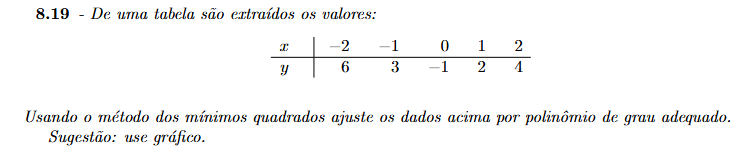

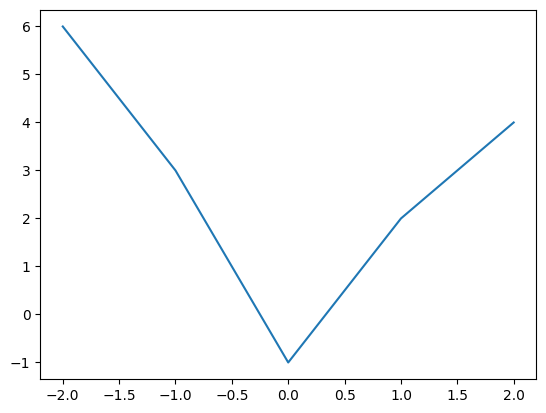

In [111]:
x819 = np.array([-2, -1, 0, 1,2])
y819 = np.array([6, 3, -1, 2, 4])

plt.plot(x819, y819)
plt.show()

A função se assemelha a uma parábola. Vamos aproximar a mesma com um polinômio de segundo grau.

In [112]:
e0_819 = np.power(x819, 0)
e1_819 = np.power(x819, 1)
e2_819 = np.power(x819, 2)
e_819 = [e0_819, e1_819, e2_819]
n = len(e_819)
# Matriz de produtos internos
C_819 = np.zeros((n, n), dtype=np.float64)
for i in range(n):
    for j in range(n - 1, i - 1, -1):
        val = np.dot(e_819[i], e_819[j])
        C_819[i, j] = val
        if i != j:
            C_819[j, i] = val

# Vetor de produtos internos
b_819 = np.zeros((n,), dtype=np.float64)
for i in range(n):
    b_819[i] = np.dot(y819, e_819[i])

a_819 = np.linalg.solve(C_819, b_819)

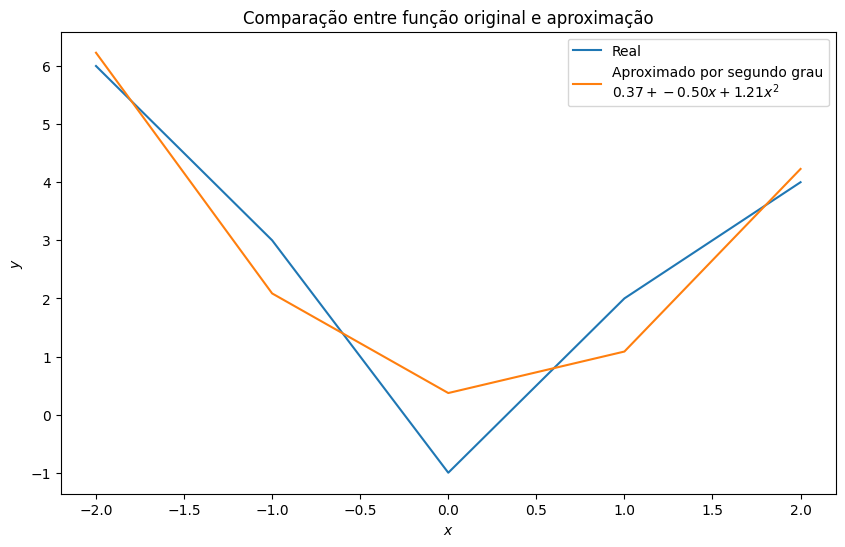

In [113]:
poly819 = lambda x: a_819[0] + a_819[1] * x + a_819[2] * x ** 2
poly819_vals = poly819(x819)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x819, y819, label="Real")
ax.plot(x819, poly819_vals, label=f"Aproximado por segundo grau\n${a_819[0]:.2f} + {a_819[1]:.2f} x + {a_819[2]:.2f} x^2 $")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

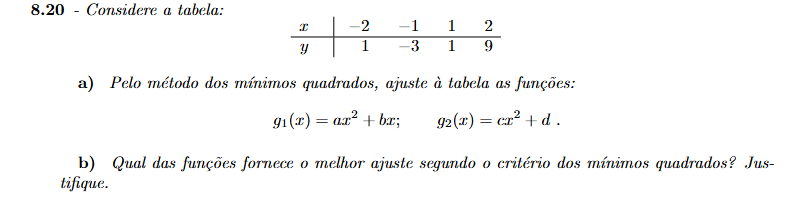

In [114]:
x820 = np.array([-2, -1, 1, 2])
y820 = np.array([1, -3, 1, 9])
e0_820 = np.power(x820, 0)
e1_820 = np.power(x820, 1)
e2_820 = np.power(x820, 2)

In [115]:
# Item g1

e_820_g1 = [e2_820, e1_820]
n_g1 = len(e_820_g1)

C_820_g1 = np.zeros((n_g1, n_g1), dtype=np.float64)
for i in range(n_g1):
    for j in range(n_g1 - 1, i - 1, -1):
        val = np.dot(e_820_g1[i], e_820_g1[j])
        C_820_g1[i, j] = val
        if i != j:
            C_820_g1[j, i] = val

b_820_g1 = np.zeros((n_g1,), dtype=np.float64)
for i in range(n_g1):
    b_820_g1[i] = np.dot(y820, e_820_g1[i])

a_820_g1 = np.linalg.solve(C_820_g1, b_820_g1)

In [116]:
# Item g2

e_820_g2 = [e2_820, e0_820]
n_g2 = len(e_820_g2)

C_820_g2 = np.zeros((n_g2, n_g2), dtype=np.float64)
for i in range(n_g2):
    for j in range(n_g2 - 1, i - 1, -1):
        val = np.dot(e_820_g2[i], e_820_g2[j])
        C_820_g2[i, j] = val
        if i != j:
            C_820_g2[j, i] = val

b_820_g2 = np.zeros((n_g2,), dtype=np.float64)
for i in range(n_g2):
    b_820_g2[i] = np.dot(y820, e_820_g2[i])

a_820_g2 = np.linalg.solve(C_820_g2, b_820_g2)

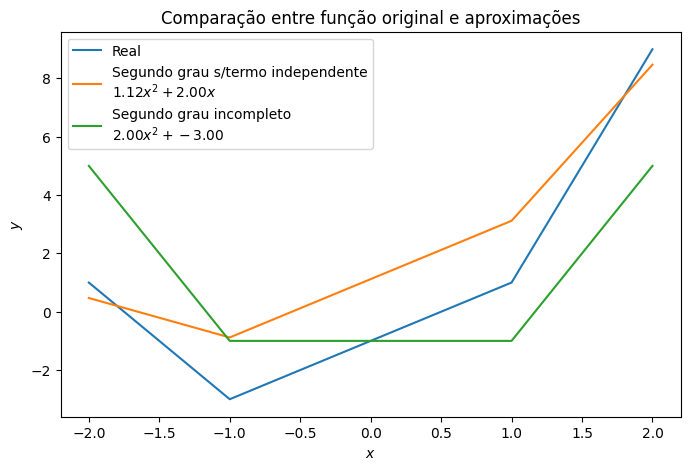

In [117]:
poly820_g1 = lambda x: a_820_g1[0] * x ** 2 + a_820_g1[1] * x
poly820_g1_vals = poly820_g1(x820)

poly820_g2 = lambda x: a_820_g2[0] * x ** 2 + a_820_g2[1]
poly820_g2_vals = poly820_g2(x820)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x820, y820, label="Real")
ax.plot(x820, poly820_g1_vals, label=f"Segundo grau s/termo independente\n${a_820_g1[0]:.2f} x^2 + {a_820_g1[1]:.2f} x$")
ax.plot(x820, poly820_g2_vals, label=f"Segundo grau incompleto\n${a_820_g2[0]:.2f} x^2 + {a_820_g2[1]:.2f}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximações")
plt.show()

O critério dos quadrados mínimos é a diferença entre cada ponto real e o ponto aproximado, elevada ao quadrado, somada para todos os pontos. Para comparar as soluções, basta ver qual retorna menor valor.

In [118]:
erro_820_g1 = np.sum(np.power(y820 - poly820_g1_vals, 2.0))
erro_820_g2 = np.sum(np.power(y820 - poly820_g2_vals, 2.0))
print(f"Erro item g1: {erro_820_g1}")
print(f"Erro item g2: {erro_820_g2}")

Erro item g1: 9.529411764705882
Erro item g2: 40.0


Logo, a função dada por $g_1(x) = 1.11764706 x^2 + 2x$ é que melhor ajusta a função tabelada.

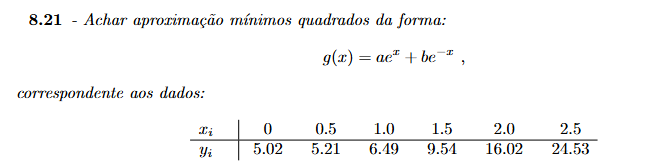

In [119]:
x821 = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5])
y821 = np.array([5.02, 5.21, 6.49, 9.54, 16.02, 24.53])
e0_821 = np.exp(x821)
e1_821 = np.exp(-x821)
e_821 = [e0_821, e1_821]
n = len(e_821)

# Matriz de produtos internos
C_821 = np.zeros((n, n), dtype=np.float64)
for i in range(n):
    for j in range(n - 1, i - 1, -1):
        val = new_dot(e_821[i], e_821[j])
        C_821[i, j] = val
        if i != j:
            C_821[j, i] = val

# Vetor de produtos internos
b_821 = np.zeros((n,), dtype=np.float64)
for i in range(n):
    b_821[i] = new_dot(y821, e_821[i])

a_821 = np.linalg.solve(C_821, b_821)

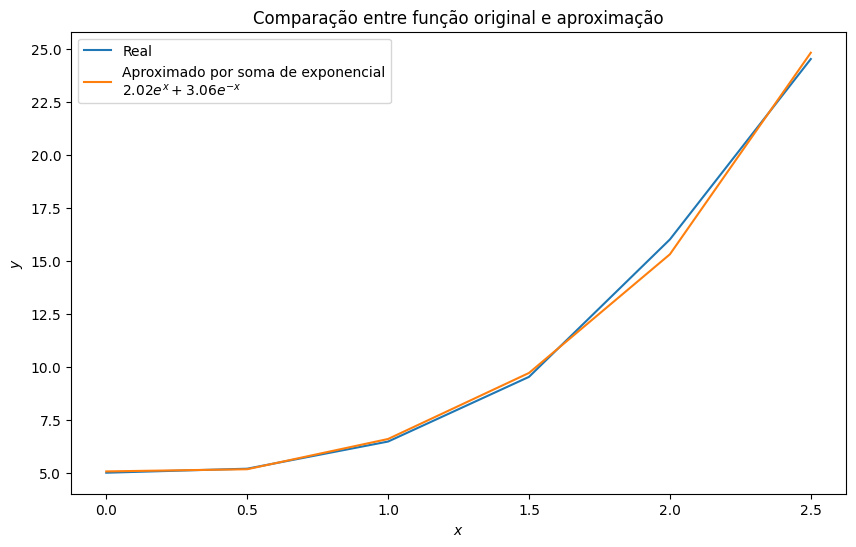

In [120]:
poly821 = lambda x: a_821[0] * np.exp(x) + a_821[1] * np.exp(-x)
poly821_vals = poly821(x821)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x821, y821, label="Real")
ax.plot(x821, poly821_vals, label=f"Aproximado por soma de exponencial\n${a_821[0]:.2f} e^x + {a_821[1]:.2f} e^{{-x}}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()